<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   int64  
dtypes: float64(2), int64(13)
memory usage: 280.4 KB
None
      StudentID  Ag

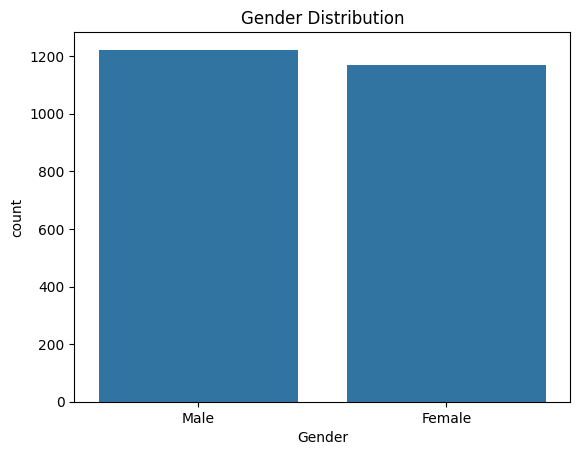

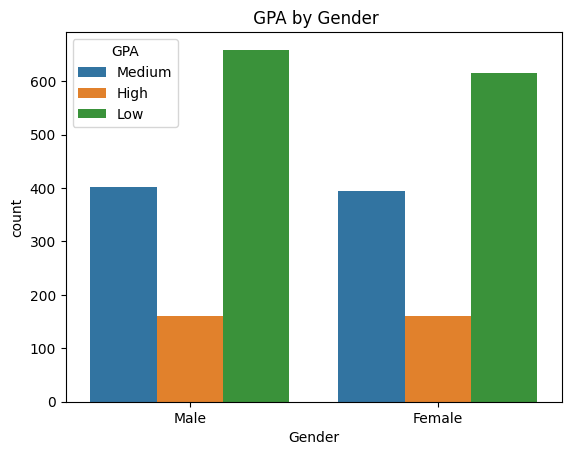

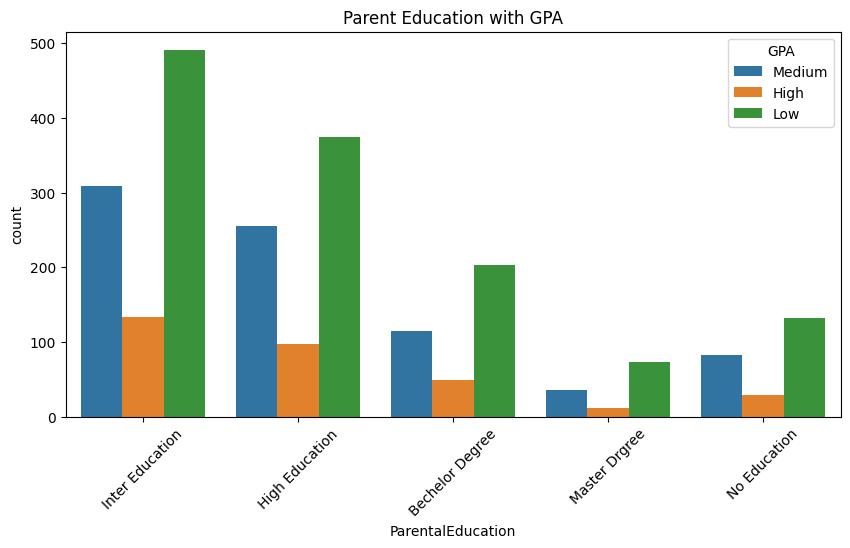

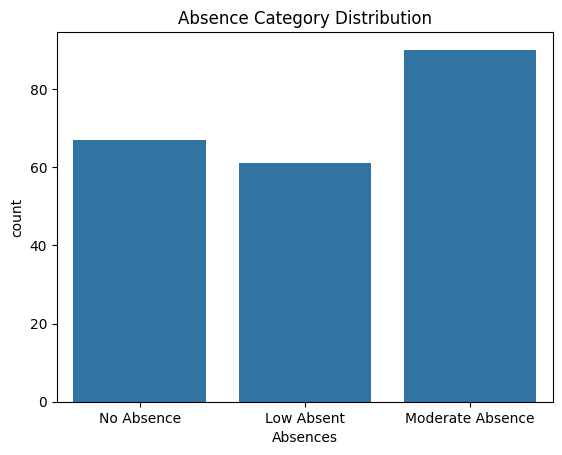

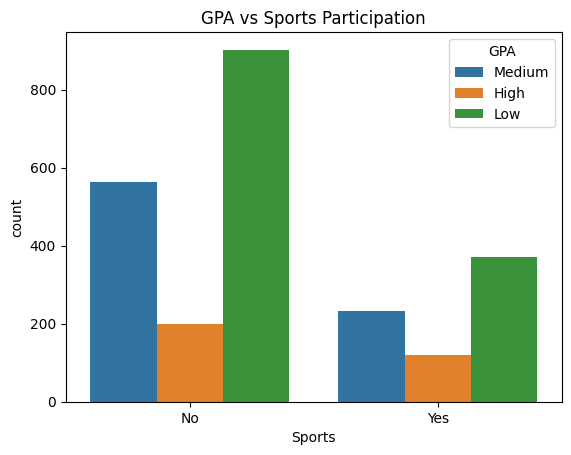

ValueError: No variables found for grid columns.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data=pd.read_csv(r"C:\Users\PC\Downloads\Student_performance_data _.csv")
print(data.info())
#print(data.head())
data['Gender']=data['Gender'].map({0:'Female',1:'Male'})
data['Ethnicity']=data['Ethnicity'].replace({
    0:'Group A',
    1:'Group B',
    2:'Group C',
    3:'Group D'

})
data['ParentalEducation']=data['ParentalEducation'].replace({
    0:'No Education',
    1:'High Education',
    2:'Inter Education',
    3:'Bechelor Degree',
    4:'Master Drgree'
})
# Categorize study time
def study_category(hours):
    if hours < 10:
        return 'Low'
    elif hours <= 20:
        return 'Medium'
    else:
        return 'High'

data['StudyTimeWeekly'] = data['StudyTimeWeekly'].apply(study_category)

def absence_cat(days):
    if days==0:
        return 'No Absence'
    if days==10:
        return 'Low Absent'
    if days==20:
        return 'Moderate Absence'
    if days==30:
        return 'Hign Absence'
data['Absences']=data['Absences'].apply(absence_cat)  
data['Tutoring']=data['Tutoring'].map({0:'No',1:'Yes'})
data['ParentalSupport']=data['ParentalSupport'].replace({
    0:'No Support',
    1:'Medium Support',
    2:'Strong Support'
})
data['Extracurricular']=data['Extracurricular'].map({0:'No',1:'Yes'})
data['Sports']=data['Sports'].map({0:'No',1:'Yes'})
data['Music']=data['Music'].map({0:'No',1:'Yes'})
data['Volunteering']=data['Volunteering'].map({0:'No',1:'Yes'})

def gpa(score):
    if score>=3.0:
        return 'High'
    elif score >=2.0:
        return 'Medium'
    else:
        return 'Low'
data['GPA']=data['GPA'].apply(gpa)
data['GradeClass']=data['GradeClass'].map({
    0:'Grade A',
    1:'Grade B',
    2:'Grade C',
    3:'Grade D',
    4:'Grade D'
})
print(data)
sns.countplot(data=data, x='Gender')
plt.title("Gender Distribution")
plt.show()

#GPA vs Gender

sns.countplot(data=data, x='Gender',hue='GPA')
plt.title(" GPA by Gender")
plt.show()

#GPA vs Parental Education
plt.figure(figsize=(10,5))
sns.countplot(data=data,x='ParentalEducation',hue='GPA')
plt.title('Parent Education with GPA')
plt.xticks(rotation=45)
plt.show()

#Absences Distribution
sns.countplot(data=data,x='Absences')
plt.title("Absence Category Distribution")
plt.show()

#GPA vs Sports
sns.countplot(data=data,x='Sports',hue='GPA')
plt.title("GPA vs Sports Participation")
plt.show()

data.to_csv("cleaned_student_data.csv", index=False)
